<a href="https://colab.research.google.com/github/alperbayram/TurkishNLP/blob/main/Twitter_Sentiment_Analysis_and_Text_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
!pip install transformers

In [55]:
!pip install nest-asyncio

In [1]:
!git clone --depth=1 https://github.com/twintproject/twint.git
%cd twint
!pip3 install . -r requirements.txt

fatal: destination path 'twint' already exists and is not an empty directory.
/content/twint
Processing /content/twint
  Created wheel for twint: filename=twint-2.1.21-cp37-none-any.whl size=38863 sha256=7cd7641b8a31378b94037171f7ab759d24fdf668fc94bd646eb5015d73462684
  Stored in directory: /tmp/pip-ephem-wheel-cache-bih_uplz/wheels/c9/bb/bd/2b559954ecc4f4905266df71e9f2e08268750df0fa1ec1a4d2
Successfully built twint
  Found existing installation: twint 2.1.21
    Uninstalling twint-2.1.21:
      Successfully uninstalled twint-2.1.21


In [2]:
import os
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import csv
from openpyxl import Workbook
from datetime import datetime
import seaborn as sns
from scipy import stats
from PIL import Image
from warnings import filterwarnings
filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [3]:
from pandas import Series, DataFrame
from datetime import datetime

In [4]:
now = datetime.now()
date_time = now.strftime("%m/%d/%Y, %H:%M:%S")
print("date and time:",date_time)

date and time: 06/02/2021, 11:34:58


In [5]:
import nest_asyncio
nest_asyncio.apply()# used once to enable concurrent actions within a Jupyter notebook.

# [**Twint**](https://github.com/twintproject/twint)
Python'da yazılmış, Twitter'ın API'sini kullanmayan gelişmiş bir Twitter kazıma ve OSINT aracı, çoğu API sınırlamasından kaçarken bir kullanıcının takipçilerini, takiplerini, Tweetlerini ve daha fazlasını kazımanıza olanak tanır.

In [6]:
import twint
   
print ("tweet alınıyor...")
c = twint.Config()
# kullanıcı adı giriniz
#c.Username = input('Username: ') 
c.Username = 'TwiterSonDakika'
c.Custom["tweet"] = ["date", "username","hour"]
c.Since = '2021-05-20'
c.until= '2021-06-01'
c.Pandas = True
twint.run.Search(c)
Tweets_df = twint.storage.panda.Tweets_df




tweet alınıyor...
1400053043245338626 2021-06-02 11:33:51 +0000 <TwiterSonDakika> İsrail’de cumhurbaşkanlığı yarışını Isaac Herzog kazandı   https://t.co/6jJVPiyagA
1400052993836343297 2021-06-02 11:33:40 +0000 <TwiterSonDakika> Silah kaçakçılarına 3 ilde eş zamanlı operasyon: 22 gözaltı   https://t.co/BqWTKI1yq2
1400045081659330562 2021-06-02 11:02:13 +0000 <TwiterSonDakika> Atilla Peker, Kutlu Adalı cinayeti hakkında ifade vermek için adliyede  https://t.co/VVNw7Vijtt
1400039316236165127 2021-06-02 10:39:19 +0000 <TwiterSonDakika> Dehşet dolu 3 gün! Mezar kazdırdı, tecavüz etti  https://t.co/bpanvrm9rK
1400038214375772164 2021-06-02 10:34:56 +0000 <TwiterSonDakika> Şoke eden iddia: Emniyet içinde birçok polis Sedat Peker'e...  https://t.co/TJiqbaOKXQ
1400037095369056262 2021-06-02 10:30:29 +0000 <TwiterSonDakika> Fatih Altaylı: Tüm açıklamalar Erkam Yıldırım’ın lehine olmadı bence  https://t.co/5KXJfUKcDi
1400019410740449282 2021-06-02 09:20:13 +0000 <TwiterSonDakika> 4 ilde insan ka

In [7]:
df_Tweetler=Tweets_df.filter(items=['tweet'])
df_Tweets = pd.DataFrame(df_Tweetler['tweet'])

In [8]:
df_Tweets

,tweet
0,İsrail’de cumhurbaşkanlığı yarışını Isaac Herz...
1,Silah kaçakçılarına 3 ilde eş zamanlı operasyo...
2,"Atilla Peker, Kutlu Adalı cinayeti hakkında if..."
3,"Dehşet dolu 3 gün! Mezar kazdırdı, tecavüz ett..."
4,Şoke eden iddia: Emniyet içinde birçok polis S...
...,...
2373,En çok vaka düşüşü yaşanan kentte pazarcılarda...
2374,Hindistan’da Covid-19 salgında yeni rekor: son...
2375,İzmir’de 2 kişinin öldüğü olayla ilgili 2 tutu...
2376,"Alkollü sürücü ""dur"" ihtarına uymadı, otomobil..."


In [9]:
x=500
Tweetler=list()
for i in range(x):
 df_Tweets = df_Tweetler.tweet[i]
 Tweetler.append(df_Tweets)
 #print(i)

In [10]:
len(Tweetler)

500

In [26]:
df_Tweetss = pd.DataFrame(Tweetler)
df_Tweetsler = df_Tweetss.rename(columns = {0: 'tweet'}, inplace = False)
df_Tweetsler

,tweet
0,İsrail’de cumhurbaşkanlığı yarışını Isaac Herz...
1,Silah kaçakçılarına 3 ilde eş zamanlı operasyo...
2,"Atilla Peker, Kutlu Adalı cinayeti hakkında if..."
3,"Dehşet dolu 3 gün! Mezar kazdırdı, tecavüz ett..."
4,Şoke eden iddia: Emniyet içinde birçok polis S...
...,...
495,Ayasofya'nın eski imamı Boynukalın Taksim Cami...
496,Aygün Aydın yataktan Hakan Sabancı'yı çağırdı...
497,Varlık Fonu sonrası zarar devam ediyor: ÇAYKUR...
498,İngiliz firma atıkların Türkiye'ye gönderilmes...


In [27]:
df_Tweetss.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       500 non-null    object
dtypes: object(1)
memory usage: 4.0+ KB


# Tweetlerin Temizlenmesi 

In [29]:
#noktalama işaretleri
df_Tweetsler["tweet"] = df_Tweetsler["tweet"].str.replace('[^\w\s]','')
# #sayılar
df_Tweetsler["tweet"]= df_Tweetsler["tweet"].str.replace('\d','')
# df_Tweetler["Tweets"]= df_Tweetler["Tweets"].str.replace('(?:\@|http?\://|https?\://|www\S+)','')
df_Tweetsler["tweet"]= df_Tweetsler["tweet"].str.replace('@[A-Za-z0-9]+','')
df_Tweetsler["tweet"] =df_Tweetsler["tweet"].str.replace('http\S+','')

In [89]:
df_Tweetsler["tweet"]

0      İsrailde cumhurbaşkanlığı yarışını Isaac Herzo...
1      Silah kaçakçılarına  ilde eş zamanlı operasyon...
2      Atilla Peker Kutlu Adalı cinayeti hakkında ifa...
3         Dehşet dolu  gün Mezar kazdırdı tecavüz etti  
4      Şoke eden iddia Emniyet içinde birçok polis Se...
                             ...                        
495    Ayasofyanın eski imamı Boynukalın Taksim Cami ...
496    Aygün Aydın yataktan  Hakan Sabancıyı çağırdı ...
497    Varlık Fonu sonrası zarar devam ediyor ÇAYKURu...
498    İngiliz firma atıkların Türkiyeye gönderilmesi...
499    Can Yaman ve  Diletta Leotta tatilde Düşman ça...
Name: tweet, Length: 500, dtype: object

In [31]:
text = " ".join(review for review in df_Tweetsler.tweet)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 32204 words in the combination of all review.


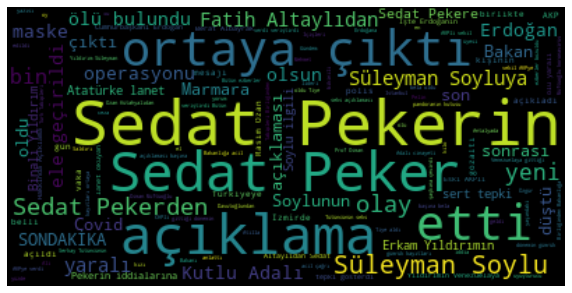

In [32]:

stopwords = set(STOPWORDS)
stopwords.update(["ben", "sen", "biz", "de", "ki", "ve", "da", "bir", "ile", "için", "bu", "ne", "gibi","amk"])

wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

In [37]:
from google.colab import drive

data_path =  "/resource/"

try:
    drive.mount('/content/drive')
    data_path = "/content/drive/My Drive/resource/"

except:
    print("You are not working in Colab at the moment :(")

Mounted at /content/drive


In [38]:
wordcloud.to_file("/content/drive/My Drive/img/kelimebulutu.png")

# **DUYGU ANALİZİ KISMI BERT MODELLERİNİN YÜKLENMESİ**

In [39]:
from transformers import pipeline, AutoModelForTokenClassification, AutoTokenizer, AutoModelForSequenceClassification

In [40]:
tokenizer= AutoTokenizer.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
model= AutoModelForSequenceClassification.from_pretrained("savasy/bert-base-turkish-sentiment-cased")

In [41]:
analysis=pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

In [42]:
analysis("allah belanı versin. seni sevmiyorum.")

[{'label': 'negative', 'score': 0.9965597987174988}]

In [43]:
code_to_label={
 'negative': 'negatif',
 'positive': 'pozitif',
    'notr': 'notr'
    
}

In [53]:
orders = len(df_Tweetsler)
print("Twit sayısı :",orders)

Twit sayısı : 500


In [54]:
Tweet = list(df_Tweetsler['tweet'])
#Tweet

# **Tweeetlerin tek tek gezilmesi ve sonuçların ve scorun boş diziye aktarılması**

In [55]:
d= list()
k= list()
for i in range(orders):
                    c= analysis(Tweet[i])
                    #a = c[0]['label']
                    a = code_to_label[c[0]['label']]
                    h =  c[0]['score']
                    #d =np.append(a)
                    d.append(a)
                    k.append(h)

# **Sonuçların Tabloya eklenmesi**

In [58]:
d
df_Tweetsler["Tweets_duygu"]= pd.DataFrame(d)
#df_Tweetler["Tweets_duygu"]=df_Tweetler["Tweets"].map(lambda x: "".join(d))


In [59]:
#df_Tweetsler["Tweets_duygu"]

0      pozitif
1      pozitif
2      negatif
3      pozitif
4      negatif
        ...   
495    negatif
496    negatif
497    negatif
498    negatif
499    negatif
Name: Tweets_duygu, Length: 500, dtype: object

# **Sonuç**

In [60]:
df_Tweetsler['Tweets_duygu'].value_counts()

negatif    383
pozitif    117
Name: Tweets_duygu, dtype: int64

# **Sonuçların Görselleştirilmesi**

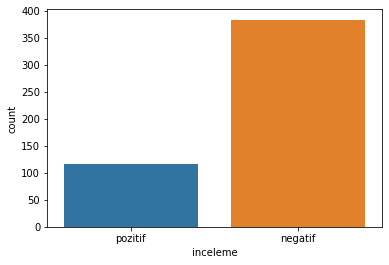

In [61]:
sns.countplot(df_Tweetsler.Tweets_duygu)
plt.xlabel('inceleme');

# **Pasta histogram ile gösterilmesi**

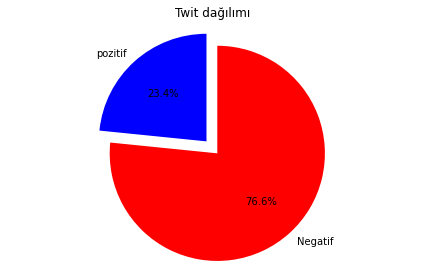

In [62]:

pozitif = (df_Tweetsler['Tweets_duygu'] == 'pozitif').sum()
negatif = (df_Tweetsler['Tweets_duygu'] == 'negatif').sum()

# put them into a list called proportions
proportions = [pozitif, negatif]

# Create a pie chart
plt.pie(
    # using proportions
    proportions,
    
    # with the labels being officer names
    labels = ['pozitif', 'Negatif'],
    
    # with no shadows
    shadow = False,
    
    # with colors
    colors = ['blue','red'],
    
    # with one slide exploded out
    explode = (0.15 , 0),
    
    # with the start angle at 90%
    startangle = 90,
    
    # with the percent listed as a fraction
    autopct = '%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

# Set labels
plt.title("Twit dağılımı")

# View the plot
plt.tight_layout()
plt.show()

# **Histogram olarak gösterilmesi**

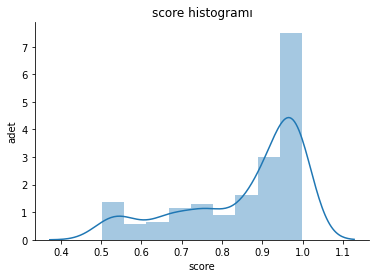

In [63]:

# create histogram
ttbill = sns.distplot(k);

# set lables and titles
ttbill.set(xlabel = 'score', ylabel = 'adet', title = "score histogramı")

# take out the right and upper borders
sns.despine()

# TWEETLERİN SINFILANDIRILMASI 

Turk-bert modellerinin yüklenmesi

In [ ]:
#Tweet

In [64]:
tokenizer= AutoTokenizer.from_pretrained("savasy/bert-turkish-text-classification")
model= AutoModelForSequenceClassification.from_pretrained("savasy/bert-turkish-text-classification")

In [65]:
sınıf=pipeline("text-classification", model=model, tokenizer=tokenizer)

In [66]:
Tweet[25]

'HDPden Süleyman Soylunun faili meçhul cinayet yok sözlerine tepki Doğrusu şu  '

In [67]:
a = sınıf(Tweet[25])
a

[{'label': 'politics', 'score': 0.9335393309593201}]

In [68]:
code_to_label={
 'world': 'dunya ',
 'economy': 'ekonomi ',
 'culture': 'kultur ',
 'health': 'saglik ',
 'politics': 'siyaset ',
 'sport': 'spor ',
 'technology': 'teknoloji '}

In [71]:
a = sınıf(Tweet[25])
a = code_to_label[a[0]['label']]
a


'siyaset '

In [72]:
kategori= list()
for i in range(orders):
                    c= sınıf(Tweet[i])
                    a = c[0]['label']
                    a = code_to_label[c[0]['label']]
                    #d =np.append(a)
                    kategori.append(a)

In [74]:
#kategori

In [81]:
kategori
df_Tweetsler["sınıflandırma"]= pd.DataFrame(kategori)
#df_Tweetler["Tweets_duygu"]=df_Tweetler["Tweets"].map(lambda x: "".join(d))


In [90]:
df_Tweetsler

,tweet,Tweets_duygu,sınıflandırma
0,İsrailde cumhurbaşkanlığı yarışını Isaac Herzo...,pozitif,dunya
1,Silah kaçakçılarına ilde eş zamanlı operasyon...,pozitif,siyaset
2,Atilla Peker Kutlu Adalı cinayeti hakkında ifa...,negatif,siyaset
3,Dehşet dolu gün Mezar kazdırdı tecavüz etti,pozitif,dunya
4,Şoke eden iddia Emniyet içinde birçok polis Se...,negatif,siyaset
...,...,...,...
495,Ayasofyanın eski imamı Boynukalın Taksim Cami ...,negatif,kultur
496,Aygün Aydın yataktan Hakan Sabancıyı çağırdı ...,negatif,siyaset
497,Varlık Fonu sonrası zarar devam ediyor ÇAYKURu...,negatif,ekonomi
498,İngiliz firma atıkların Türkiyeye gönderilmesi...,negatif,dunya


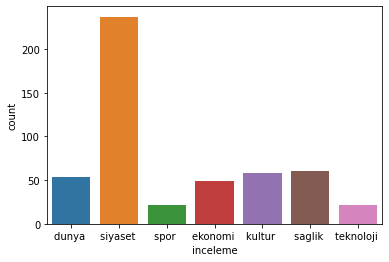

In [83]:
sns.countplot(df_Tweetler.sınıflandırma)
plt.xlabel('inceleme');

In [84]:
df_Tweetsler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet          500 non-null    object
 1   Tweets_duygu   500 non-null    object
 2   sınıflandırma  500 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB


In [85]:
sonuciki = df_Tweetsler["sınıflandırma"].value_counts()
sonuciki

siyaset       237
saglik         60
kultur         58
dunya          53
ekonomi        49
spor           22
teknoloji      21
Name: sınıflandırma, dtype: int64

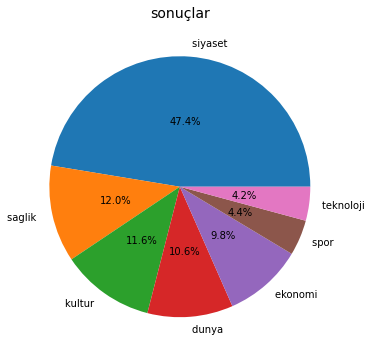

In [86]:
pie, ax = plt.subplots(figsize=[10,6])
labels = sonuciki.keys()
plt.pie(x=sonuciki, autopct="%.1f%%", explode=None, labels=labels, pctdistance=0.5)
plt.title("sonuçlar", fontsize=14);

In [87]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [88]:
df_Tweetsler.to_csv('data.csv')
!cp data.csv "drive/My Drive/"

[***Evet arkdaşlar sona geldiniz bi starınız alırım... :) İşinize yaradıysa ne mutlu bana..kolay gelsin***](https://github.com/alperbayram/Turkish-NLP-examples)